# Welcome to lab_kmeans! 🌎

In this lab, you will continue your exploration of machine learning by doing some KMeans clustering! 

A few tips to remember:

- **You are not alone on your journey in learning programming!** You have your lab Teaching Assistant, your Course Aides, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help! When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same ***ah-hah*** moment!
- We are here to help you! Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [ ]:
# Meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = ""
ca1_name = ""
ca2_name = ""


# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# Question of the Day (QOTD) to Ask Your Group: "..."
partner1_name = ""
partner1_netid = ""
partner1_ = ""

partner2_name = ""
partner2_netid = ""
partner2_ = ""

partner3_name = ""
partner3_netid = ""
partner3_ = ""

<hr style="color: #DD3403;">

# Part 1: The World Happiness Dataset
Every year, the UN Sustainable Development Solutions Network (SDSN) creates a **report** detailing the "happiness" of various countries in the world. Utilizing economic, social, and health data, they create the [World Happiness Report](https://worldhappiness.report/about/). Curators of the report **observed survey data** of seven variables (GDP Per Capita, Social Support, Life Expectancy, Freedom, Generosity, Corruption, and Dystopia), estimating their **associations with life** evaluations, ultimately coming up with a `Happiness Score` for each country.  

Some of their report uses data that we can analyze for this lab. We've collected a version of the 2023 **World Happiness** into a dataset and provided it in **CSV format** - it's the `happiness-report-2023.csv` file! 

## Puzzle 1.1: Loading In

Load the **World Happiness Dataset** from `happiness-report-2023.csv` and store it in the DataFrame `df`:

In [3]:
import pandas as pd


df = pd.read_csv('happiness-report-2023.csv')

### 🔬 Test Case Checkpoint 🔬

In [4]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert('df' in vars()), "The DataFrame should be loaded in as a variable named `df`."
assert(len(df) == 137), "This is not the dataset we are looking for..."
assert('Happiness Score' in df), "This is not the dataset we are looking for..."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.2: Correlation Coefficients
Let's explore a bit about our dataset. It's always good practice to explore and understand your data before performing any machine learning task. Generate the **correlation coefficient matrix** of our **World Happiness Dataset**, `df` in the cell below:

In [9]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix


,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
Happiness Score,1.000000,0.784367,0.834532,0.746928,0.662924,0.044082,-0.471911,0.494452
GDP Per Capita,0.784367,1.000000,0.738069,0.837533,0.451439,-0.156456,-0.436961,-0.044568
Social Support,0.834532,0.738069,1.000000,0.725524,0.541630,0.036574,-0.272490,0.148731
Healthy Life Expectancy,0.746928,0.837533,0.725524,1.000000,0.415092,-0.135036,-0.404396,-0.014420
Freedom,0.662924,0.451439,0.541630,0.415092,1.000000,0.170229,-0.383786,0.211993
Generosity,0.044082,-0.156456,0.036574,-0.135036,0.170229,1.000000,-0.122653,0.016380
Corruption,-0.471911,-0.436961,-0.272490,-0.404396,-0.383786,-0.122653,1.000000,-0.004467
Dystopia,0.494452,-0.044568,0.148731,-0.014420,0.211993,0.016380,-0.004467,1.000000


### Group Analysis: Correlations

In the correlation coefficient matrix, the largest value not on the main diagonal was `0.837533` and the lowest was `-0.471911`.

**Q1: What does this tell you about the linear correlation of our dataset?**

In our dataset, the coefficients vary significantly. Some pairs of variables have a high positive correlation, indicating that they tend to increase together, while others have a negative correlation, indicating that one tends to decrease when the other increases

**Q2: Which two columns were the most highly correlated, producing a coefficient of `0.837533`? Given the real-life context, does this make sense? Why or why not?**

The most highly correlated columns are GDP Per Capita and Healthy Life Expectancy with a coefficient of 0.837533. This makes sense in a real-life context as countries with higher GDP per capita typically have better healthcare systems and resources for maintaining a healthy lifestyle, leading to a longer healthy life expectancy.

**Q3: All of the columns in our dataset show significant correlation with `Happiness Score` except for `Generosity` (with a coefficient of `0.044082`).This means there is almost no relationship between the percieved `Generosity` of a country and it's `Happiness Score`. How you make sense of this?**

The almost zero correlation between Generosity and Happiness Score indicates that these variables don't have a linear relationship in our dataset. This could suggest that the perceived generosity of a country doesn't have a significant impact on its happiness score. There may be many reasons for this, for example, cultural differences in how generosity is perceived and experienced, or the presence of other factors that have a stronger impact on happiness.

## Puzzle 1.3: Visualization
Now, let's visualize the relationships between some variables in our dataset. 

Using `df.plot.scatter()`, generate a scatterplot showing the relationship between `GDP Per Capita` and `Healthy Life Expectancy`. Remember to specify these columns as the **x** and **y** of the scatterplot.


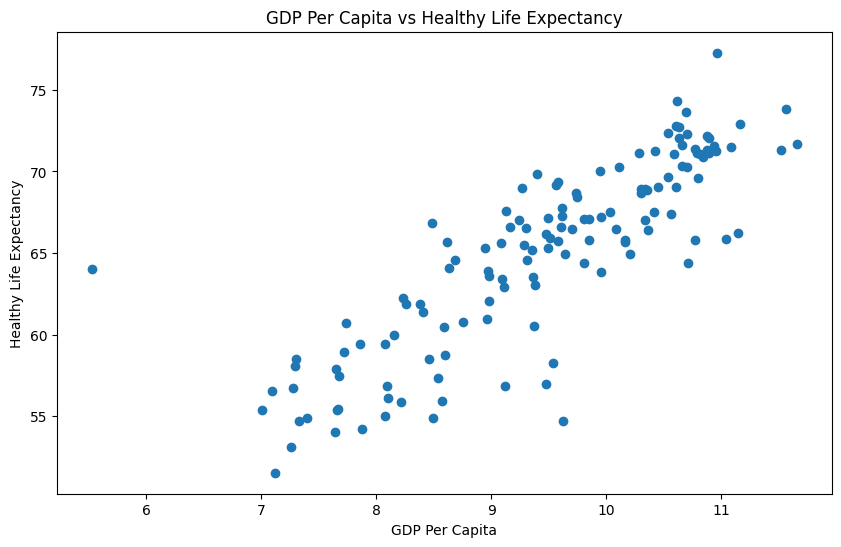

In [10]:
import matplotlib.pyplot as plt

# Create a scatterplot of GDP Per Capita vs Healthy Life Expectancy
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP Per Capita'], df['Healthy Life Expectancy'])
plt.title('GDP Per Capita vs Healthy Life Expectancy')
plt.xlabel('GDP Per Capita')
plt.ylabel('Healthy Life Expectancy')
plt.show()


**Q4: Observing the plot above, how would you divide the data into two groups (clusters)?**

Countries with low to moderate GDP per capita (from about 0 to around 8)
Countries with high GDP per capita (from around 8 to 11 and beyond)

Now, generate a scatterplot showing the relationship between `Happiness Score` and `Generosity`:

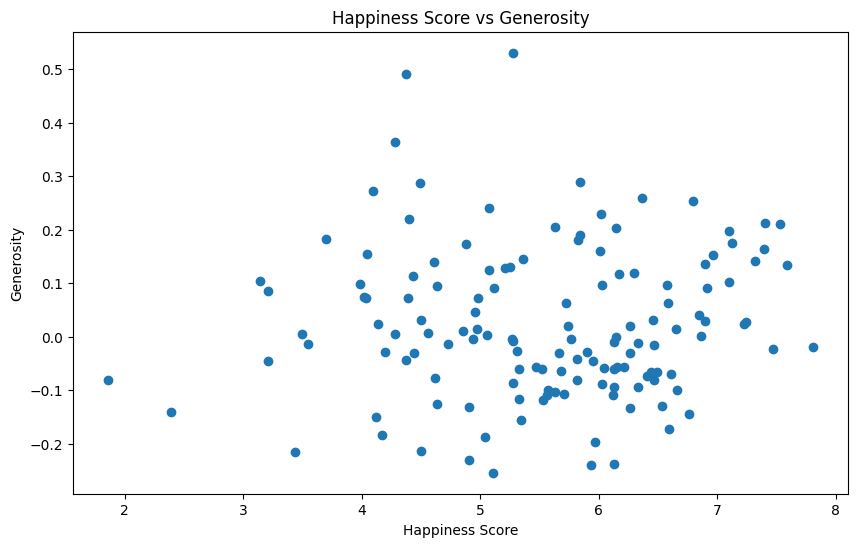

In [11]:
# Create a scatterplot of Happiness Score vs Generosity
plt.figure(figsize=(10, 6))
plt.scatter(df['Happiness Score'], df['Generosity'])
plt.title('Happiness Score vs Generosity')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')
plt.show()


**Q5: Observing the plot above, how would you divide the data into two groups (clusters)?**

Given the scatter plot between Happiness Score and Generosity is quite scattered and doesn't show a clear relationship, dividing the data into clusters could be challenging. However, a possible way

Countries with low to moderate Happiness Scores and varied levels of Generosity
Countries with high Happiness Scores and varied levels of Generosity

<hr style="color: #DD3403;">

# Part 2: Clustering
Now that we've observed some relationships in our dataset, it's time to try **clustering the data**! You may have noticed that our dataset contains fairly high **correlation coefficients** across **multiple columns**. Despite this, it will still be **valuable** to perform **KMeans clustering**. 

With a **KMeans clustering** model, we will be able to both:
- Identify potential relationships between **non-linear** variables, and
- Identify the **most important *features*** of our dataset by looking at **cluster centroids**

Before we begin, remember that KMeans clustering is a method of **unsupervised** machine learning, meaning unlike `lab_regression`, we **do not provide** **labels** or target values. Rather, we will **allow the model** to determine **groups of the data** based on their similarity alone. 

## Part 2.1: Creating a KMeans Model

In the cell below, create a new KMeans model named `kmeans` that contains just **two (2) clusters**:


In [17]:
# Import the KMeans library:
%pip install scikit-learn

from sklearn.cluster import KMeans


# Create a KMeans model:
kmeans = KMeans(n_clusters=2)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 14.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 9.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Part 2.2: Fitting Numeric Columns to the Model
The KMeans model only works on **numeric data** (*you can't find a mean -- or average -- of non-numbers*). The following code provides a list of all the **numeric columns** in our `df`. We've provided you with the cell below to define and store the `numeric_columns` list.

*Do not modify the cell below - just **run it!***

In [18]:
numeric_columns = ['Happiness Score', 'GDP Per Capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Generosity', 'Corruption','Dystopia']
numeric_columns

['Happiness Score',
 'GDP Per Capita',
 'Social Support',
 'Healthy Life Expectancy',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia']

Try to `fit` the kmeans model data from the `numeric_columns`.

Note: You should **expect to see** a `ValueError: Input X contains NaN.!` Make sure to get that **error message** - this is **intended**!

In [19]:
kmeans.fit(df[numeric_columns])

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Puzzle 2.3: Find the Rows with Missing Numeric Data Columns
The **error message** above provides details on several solutions to dealing with **missing data**. To continue to use `KMeans`, our best option is to **drop rows with missing data**. Find the rows that have missing data in the `numeric_columns` and store those rows in the DataFrame `drops`:



In [23]:
drops = df[df[numeric_columns].isna().any(axis=1)]
drops

,Country,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
98,State of Palestine,4.908,8.716,0.859,NaN,0.694,-0.132,0.836,NaN


### 🔬 Test Case Checkpoint 🔬

In [21]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
from math import isnan 
assert(len(drops) == 1), "There should be one row with missing data in our dataset."
assert(len(drops.index.isin(df.index)) == 1), "This row should be a row that is in `df`."
assert(isnan(drops.iloc[0]['Healthy Life Expectancy']) and isnan(drops.iloc[0]['Dystopia'])), "The one row should be missing values for the `Healthy Life Expectancy` and `Dystopia` columns."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Part 2.4: Drop the Rows with Missing Data
Provided below is a snippet of code that creates a new DataFrame, `df2`, that contains only a **copy of the rows** that can be used for clustering:

In [22]:
df2 = df[ ~df.index.isin(drops.index) ].copy()
df2

,Country,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,2.363
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2.084
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,2.250
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,2.691
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,2.110
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,1.162
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,0.905
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,1.221
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,-0.110


## Part 2.5: Normalizing the Numeric Data

In lecture, you learned that means are **VERY sensitive** to **outliers**. Since our data comes from **different ranges**, we must **normalize the numeric data**. To **normalize the data**, we can divide **each numeric column** by the **maximum value** of the column. This is done in the provided code below.

Notice that, in the result, all column values are now **scaled to be between 0 and 1**. Since all values are now in the **same range**, we no longer have any column with values in a different range.

*Do not modify the cell below - just **run it!***

In [24]:
for column in numeric_columns:
    df2[column] = df2[column] / df2[column].abs().max()
df2[numeric_columns]

,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
0,1.000000,0.925557,0.985758,0.920678,1.000000,-0.035782,0.195910,0.799662
1,0.972066,0.940137,0.970498,0.921972,0.971904,0.252354,0.210980,0.705245
2,0.964890,0.934477,1.000000,0.932324,0.973985,0.397363,0.719053,0.761421
3,0.957586,0.912436,0.959308,0.940696,0.841831,-0.043315,0.762110,0.910660
4,0.948616,0.938422,0.946083,0.925854,0.922997,0.401130,0.407966,0.714044
...,...,...,...,...,...,...,...,...
132,0.410943,0.600943,0.663276,0.716550,0.690947,0.161959,0.897740,0.393232
133,0.410559,0.655317,0.701933,0.699405,0.680541,-0.086629,0.824543,0.306261
134,0.402101,0.634134,0.564598,0.710404,0.686785,0.197740,0.923574,0.413198
135,0.306509,0.812864,0.539166,0.855965,0.493236,-0.265537,0.959096,-0.037225


## Puzzle 2.6: Training with `numeric_columns` from `df2`

Now that we have handled missing data and normalized the numeric data, we can **train our model**! Using the `numeric_columns` and `df2`, `fit` your `kmeans` model:

In [25]:
# Training the model
kmeans.fit(df2[numeric_columns])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

### 🔬 Test Case Checkpoint 🔬

In [26]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(isinstance(kmeans, KMeans)), "The `kmeans` model should be saved as `kmeans`."
assert(kmeans.n_clusters == 2), "The `kmeans` model should have two clusters."
assert(kmeans.cluster_centers_ is not None), "The `kmeans` model should be trained with `df2`'s `numeric_columns`."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.7: Centroids

In lecture, you learned that `kmeans.cluster_centers_` will display the location of the **final centroids**.

The **order they're displayed** will be the **same order** as the columns are listed in `numeric_columns`. 

Explore the **centroids** and **numeric columns** by **running the cells below**:


In [28]:
# Exploring the centroids
print("Centroids:")
print(kmeans.cluster_centers_)



Centroids:
[[ 0.67568319  0.78921639  0.78415163  0.82679484  0.7964182  -0.0765388
   0.84260382  0.61013804]
 [ 0.79104524  0.86117015  0.87799916  0.87284786  0.87485089  0.32456019
   0.63482895  0.58194049]]


In [27]:
print(numeric_columns)
numeric_columns

['Happiness Score', 'GDP Per Capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']


['Happiness Score',
 'GDP Per Capita',
 'Social Support',
 'Healthy Life Expectancy',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia']

### Analysis: Centroids

**Q6: In the following cell, answer both of these questions:**
- Looking at the centroids above, which cluster would you expect to have the **"happier"** countries? How do you know? 
- Which **features** are arguably **most important** to defining the **centroids**? (**Hint:** Look for the largest *differences* between values from centroid to centroid)



Looking at the centroids, I'd expect the second cluster (index 1) to have the "happier" countries. This is because the Happiness Score is higher for the second centroid compared to the first one (0.791 vs. 0.676)

## Puzzle 2.8: Prediction

Now, we can use our model to **assign each country** in our dataset to one of the two **clusters**!

Using your `kmeans` model and the `numeric_columns`, `predict` the centroid for each row and store that prediction in a new column in `df2` called `cluster`:



In [29]:
# Assigning each row to a cluster
df2['cluster'] = kmeans.predict(df2[numeric_columns])


### 🔬 Test Case Checkpoint 🔬

In [30]:
## == TEST CASES for Puzzle 2.8 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
import pandas.api.types as ptypes
assert('cluster' in df2.columns.to_list()), "The cluster predictions should be stored in a column `cluster` of `df2`."
assert(ptypes.is_numeric_dtype(df2['cluster'])), "The `cluster` column should be numeric."
assert(set(df2.cluster.unique()) == set([0, 1])), "The `cluster` column should contain values of 0 and 1 (representing the cluster of each row)."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.9: Visualizing Your Model

In the cell below, we've used `df2.plot.scatter()` to display a **scatterplot** of some columns of our data. We specify the **parameter** `c` (color) to be the `cluster` of each data point, visualizing the **two clusters** in **two different colors**. 

The columns in the scatterplot that will be generated below are of `GPD Per Capita` (on the x-axis) and `Happiness Score` (on the y-axis).

*Do not modify the cell below - just **run it!***

<Axes: xlabel='GDP Per Capita', ylabel='Happiness Score'>

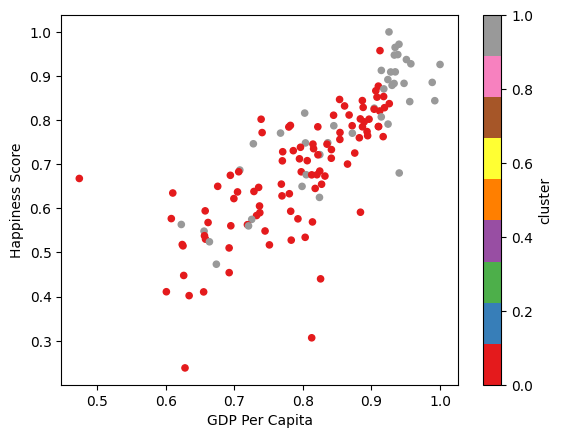

In [31]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Happiness Score',
    c="cluster",
    colormap='Set1'
)

**Q7: In the plot above, do we see clean clusters, or are points intermingled? What does this say about our clustering model in relation to the columns shown in the plot?**

theres a pretty clean cluster in a general trend of a line! This says that there is a general trend to support our claim.

Next, using the code from **above** as a template, generate a **scatter plot** of `df2` such that:
- We observe the **relationship between** `Happiness Score` and `Generosity` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='Happiness Score', ylabel='Generosity'>

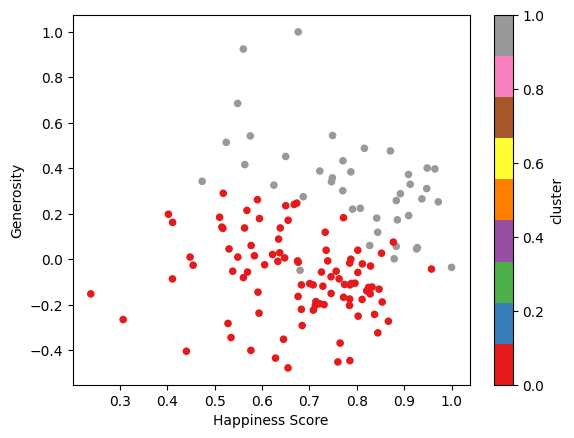

In [32]:
df2.plot.scatter(
    x='Happiness Score', 
    y='Generosity',
    c="cluster",
    colormap='Set1'
)

**Q8: In the plot above, do we see clean clusters, or are points intermingled? In Part 1, you may have observed a low correlation between `Happiness Score` and `Generosity`. Does this make sense given the clusters above? Why or why not?**

the clusters are not too clean, a little intermingled. this makes sense given the clusters above because there seems to be a relationship which leads to correlation.

Finally, generate a **scatter plot** of `df2` such that:
- We observe the **relationship between** `GDP Per Capita` and `Healthy Life Expectancy` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='GDP Per Capita', ylabel='Healthy Life Expectancy'>

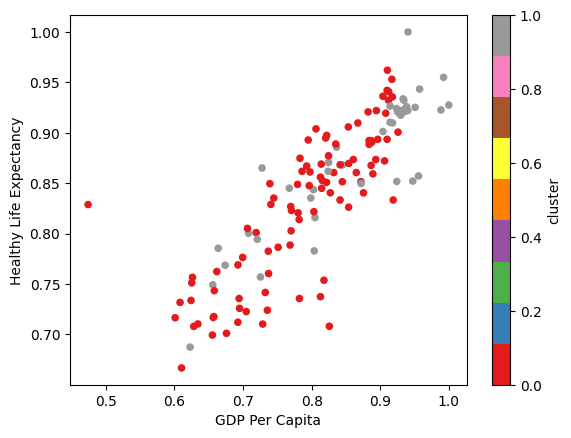

In [33]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Healthy Life Expectancy',
    c="cluster",
    colormap='Set1'
)

**Q9: In the plot above, do we see clean clusters, or are points intermingled? In Part 1, you may have observed a high correlation between `GDP Per Capita` and `Healthy Life Expectancy`. Does this make sense given the clusters above? Why or why not?**

the clusters for a clear trend in a positive linear direction, the clusters are not too intermingled, and this supports a relationship between the two variables.

<hr style="color: #DD3403;">

# Part 3: A Third Cluster
Our first `kmeans` model was created with only **two (2) clusters**. This is a valid start, but perhaps **more clusters** suit the dataset better. 

Let's experiment by adding **an additional cluster** and observe any differences in model results!

## Puzzle 3.1: Creating and Training our Model

In the cell below, create a new KMeans model named `kmeans_three` that contains **three (3) clusters**:


In [34]:
kmeans_three = KMeans(n_clusters=3)


Recall that KMeans models can only be fit to **numeric data**, and the data **cannot be NaN**. 

Using the `numeric_columns` and `df2`, `fit` your `kmeans_three` model:

In [36]:

kmeans_three.fit(df2[numeric_columns])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

### 🔬 Test Case Checkpoint 🔬

In [37]:
## == TEST CASES for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(isinstance(kmeans_three, KMeans)), "The KMeans model with three clusters should be saved as `kmeans_three`."
assert(kmeans_three.n_clusters == 3), "The `kmeans_three` model should have three clusters."
assert(kmeans_three.cluster_centers_ is not None), "The `kmeans_three` model should be trained with `df2`'s `numeric_columns`."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.2: Model Centroids

Explore the **centroids** of your `kmeans_three` model alongside the  **numeric columns** by **running the cells below**:

Remember, the **order of numbers displayed** will be the **same order** as the columns are listed in `numeric_columns`. 

In [38]:
print(kmeans_three.cluster_centers_)


[[ 0.8838256   0.93321898  0.92599186  0.91524489  0.92464447  0.20935342
   0.46210083  0.60513254]
 [ 0.59618145  0.70985249  0.70309257  0.7729485   0.76836629  0.22485876
   0.85890205  0.60574619]
 [ 0.73551405  0.84505893  0.8566764   0.866435    0.82127152 -0.16502643
   0.83935206  0.59697069]]


In [39]:
print(numeric_columns)


['Happiness Score', 'GDP Per Capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']


### Analysis: Centroids, Again
**Q10: Once more, answer both of these questions:**
- Looking at the centroids above, which cluster would you expect to have the **"happiest"** countries? How do you know? 
- Which **features** are arguably **most important** to defining the **centroids**? (**Hint:** Look for the largest *differences* between values from centroid to centroid)

Looking at the centroids above, the first cluster (index 0) seems to represent the "happiest" countries. This is because it has the highest value for 'Happiness Score' among the three clusters. Additionally, it also has high values for 'GDP Per Capita', 'Social Support', 'Healthy Life Expectancy', and 'Freedom', which are all factors that could contribute to a country's happiness score. The features that are most important in defining the centroids could be identified by looking at the features with the largest differences between the centroids. Here, 'Generosity' and 'Corruption' show significant differences across the centroids. These features may be crucial in differentiating between the clusters.

## Puzzle 3.3: Prediction, Again
Now, we are going to predict the closest cluster centroids for each of our rows (countries). Using your `kmeans_three` model and the `numeric_columns`, `predict` the centroid for each row and store that prediction in a new column in `df2` called `three_cluster`:

In [40]:
df2['three_cluster'] = kmeans_three.predict(df2[numeric_columns])


### 🔬 Test Case Checkpoint 🔬

In [41]:
## == TEST CASES for Puzzle 3.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
import pandas.api.types as ptypes
assert('three_cluster' in df2.columns.to_list()), "The cluster predictions for your kmeans_three model should be stored in a column `three_cluster` of `df2`."
assert(ptypes.is_numeric_dtype(df2['three_cluster'])), "The `three_cluster` column should be numeric."
assert(set(df2.three_cluster.unique()) == set([0, 1, 2])), "The `three_cluster` column should contain values of 0, 1, and 2 (representing the cluster of each row)."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.4: Visualizing Your Model, Again

Now that we've trained and predicted our `kmeans_three` model, we can visualize a **scatterplot** of our data in clusters. We specify the **parameter** `c` (color) to be the `three_cluster` of each data point, visualizing the **three clusters** in **three different colors**. 

The columns in the scatterplot that will be generated below are of `GPD Per Capita` (on the x-axis) and `Happiness Score` (on the y-axis).

Notice this code is **identical** to that from Puzzle 2.9, with the singular change of the `c` parameter passed to `scatter()`. 

*Do not modify the cell below - just **run it!***

<Axes: xlabel='GDP Per Capita', ylabel='Happiness Score'>

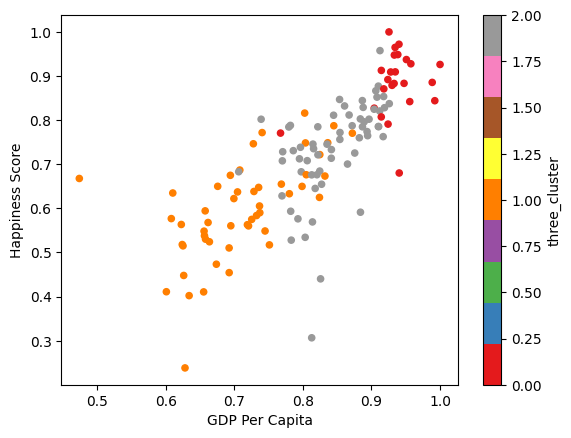

In [42]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Happiness Score',
    c="three_cluster",
    colormap='Set1'
)

**Q11: In the plot above, do we see clean clusters, or are points intermingled? What does this say about our clustering model in relation to the columns shown in the plot?**

There's pretty clean clusters in terms of coloring. There is a little bit of intermingling but for the most part the clustering is clean. This says there is support for correlation.

Next, again, using the code from **above** as a template, generate a **scatter plot** of `df2` such that:
- We observe the **relationship between** `Happiness Score` and `Generosity` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='Happiness Score', ylabel='Generosity'>

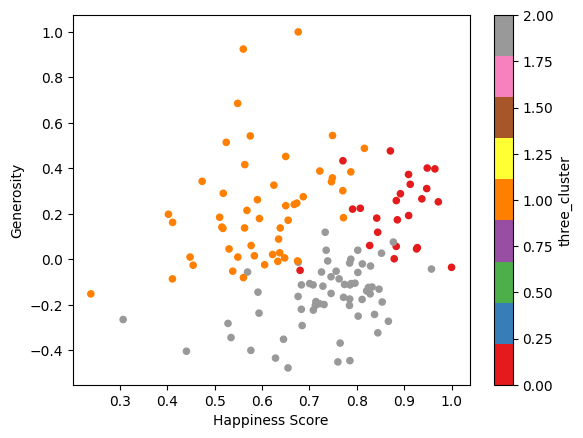

In [43]:
df2.plot.scatter(
    x='Happiness Score', 
    y='Generosity',
    c="three_cluster",
    colormap='Set1'
)


**Q12: In the plot above, do we see clean clusters, or are points intermingled? In Part 1, you may have observed a low correlation between `Happiness Score` and `Generosity`. Does this make sense given the clusters above? Why or why not?**

The clusters are pretty clean, but they do not haave a general trend that they follow like a linear relationship. I see that it definetly makes sense given the clustering above because there is a clear weak relationship present on the graph. 

One last time, generate a **scatter plot** of `df2` such that:
- We observe the **relationship between** `GDP Per Capita` and `Healthy Life Expectancy` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='GDP Per Capita', ylabel='Healthy Life Expectancy'>

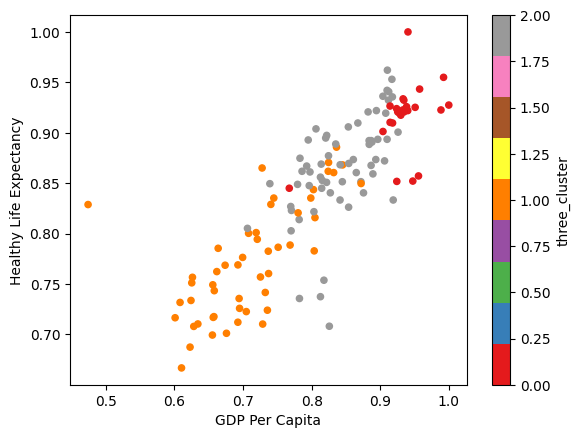

In [44]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Healthy Life Expectancy',
    c="three_cluster",
    colormap='Set1'
)


**Q13: In the plot above, do we see clean clusters, or are points intermingled? In Part 1, you may have observed a high correlation between `GDP Per Capita` and `Healthy Life Expectancy`. Does this make sense given the clusters above? Why or why not?**

Clear clusters, a littl ebit of intermingling probably due to other factors. This makes sense given the correlation coefficient since it was high and indicative of a relationship between the two variables.

### Group Analysis: Comparing Models
**Q14:** Now that we've **trained and visualized** both a **two-cluster** and **three-cluster** KMeans model on the World Happiness Dataset, make some observations about the **performance of both**. Do you think one of the two models we've created **better clusters** the dataset or **reflects patterns** within it? Backup your answer with **at least three observations** from your visualizations. 



Comparing the two models, the three-cluster model seems to provide a more detailed view of the data while the two cluster model is easier to read, so it just depends on what you are looking for. My observations:

1.  It separates the countries into three groups instead of two, allowing us to identify an additional set of countries that might be "in-between" the happiest and unhappiest ones
2. While the three-cluster model gives us more detail, it also introduces some overlap between clusters
3.The two-cluster model may provide a more interpretable division of the data. The division can be perceived as 'happier' and 'less happy' countries, which is a straightforward interpretation. 

*Side Note:* If you are curious, there are **numeric metrics** in the `sklearn.metrics` module that can be used to evaluate clustering models **quantitatively**. Feel free to investigate any of those metrics on your own time (**not required** for this lab). One example of such a metric is **silhouette score** - which measures how similar an object is to its own cluster versus neighboring cluster(s).

<hr style="color: #DD3403;">

# Part 4: Reflecting on Machine Learning

Q15: Consider the takeaways from both this lab and the previous (`lab_regression`). You've learned a lot about two **fundamental machine learning** techniques - **regression** and **clustering**. Given your experience, answer the following questions in a paragraph-style response:
- When would you employ **regression** rather than **clustering** and vice-versa? What are the most important *"tells"* that a dataset can have to guide your intuition? 
- Do you believe that **clustering** was particularly effective for the **World Happiness Dataset**? What takeaways do you think **regression** have provided instead? 
- How would you approach conducting Machine Learning on our **Hello Dataset**? Do you believe it is better suited for **regression** or **clustering**? Both?  



Regression is best when we want to predict a specific outcome based on input variables. It's useful when we know what we're predicting and how inputs might relate to that prediction.

Clustering is great for understanding patterns and structures in data. It's ideal when we want to see how data groups naturally, rather than making exact predictions.

For the World Happiness Dataset, clustering helps identify common traits in happy and unhappy countries. But, regression could help understand how different factors directly impact happiness scores.

For the Hello Dataset, if we want to predict a specific outcome, regression is suitable. If we're more interested in seeing natural groupings in data, clustering would work better.

<hr style="color: #DD3403;">

# Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)